In [124]:
import os
import numpy as np
import pandas as pd
from tensorflow.keras.utils import load_img
import tensorflow as tf
from tqdm import tqdm
import csv
from PIL import Image


In [125]:
path_to_lines = '/content/drive/MyDrive/lines folder'

In [126]:
path_to_images = '/content/drive/MyDrive/IM'

In [131]:
writers = pd.read_csv('https://raw.githubusercontent.com/samerabufoul/MLDL-project/main/Writers%20data.csv?token=GHSAT0AAAAAAB7GHCXYKXHTSSTKHYMUN6AIY73SFFQ',index_col = 0)

In [132]:
lines = pd.read_csv('https://raw.githubusercontent.com/samerabufoul/MLDL-project/main/lines%20writer.csv?token=GHSAT0AAAAAAB7GHCXYBJH44UMBMSWGTZNIY73SFRQ', index_col = 0)

In [133]:
images = pd.read_csv('https://raw.githubusercontent.com/samerabufoul/MLDL-project/main/writers%20images.csv?token=GHSAT0AAAAAAB7GHCXYIJW6DVUU4ZAIZIH6Y73SGBQ', index_col = 1)

In [134]:
writers_dict = writers.to_dict('index')

In [135]:
lines_dict = lines.to_dict('index')

In [136]:
images_dict = images.to_dict('index')

In [137]:
writers_dict.get(1000)

{'Gender': 'F',
 'WritingType': 'Right-handed',
 'NativeLanguage': 'German',
 'EducationalDegree1': 'Matur'}

##images processing

In [138]:
def labeling(gender, writing_type):
    if (gender == 'M') & (writing_type == 'Right-handed'):
      return 0,0
    if (gender == 'M') & (writing_type == 'Left-handed'):
      return 0,1
    if (gender == 'F') & (writing_type == 'Right-handed'):
      return 1,2
    if (gender == 'F') & (writing_type == 'Left-handed'):
      return 1,3

In [139]:
image_paths = []
writing_type_labels = []
gender_labels = []
for filename in tqdm(os.listdir(path_to_images)):
    image_path = os.path.join(path_to_images, filename)
    writer = images_dict.get(filename).get('Writer')
    gender = writers_dict.get(writer).get('Gender')
    writing_type = writers_dict.get(writer).get('WritingType')
    gender_labeled,gender_writingt = labeling(gender,writing_type)
  
    image_paths.append(image_path)
    writing_type_labels.append(gender_writingt)
    gender_labels.append(gender_labeled)

100%|██████████| 1539/1539 [00:00<00:00, 231371.51it/s]


In [140]:
df_im = pd.DataFrame()
df_im['image'], df_im['writing'], df_im['gender'] = image_paths, writing_type_labels, gender_labels

In [141]:
df_im

,image,writing,gender
0,/content/drive/MyDrive/IM/e01-062.png,0,0
1,/content/drive/MyDrive/IM/e01-081.png,0,0
2,/content/drive/MyDrive/IM/e01-086.png,0,0
3,/content/drive/MyDrive/IM/e01-092.png,0,0
4,/content/drive/MyDrive/IM/e01-102.png,0,0
...,...,...,...
1534,/content/drive/MyDrive/IM/e01-032.png,0,0
1535,/content/drive/MyDrive/IM/e01-035.png,0,0
1536,/content/drive/MyDrive/IM/e01-050.png,0,0
1537,/content/drive/MyDrive/IM/e01-055.png,0,0


In [142]:
df_im.to_csv('paragraph classification.csv')
files.download('paragraph classification.csv')

<IPython.core.display.Javascript object>

<IPython.core.display.Javascript object>

In [143]:
def extract_features_image(images):
    features = []
    for image in tqdm(images):
        img = load_img(image, color_mode = "grayscale")
        img = img.crop((0, 610, 2479, 2810))
        img = img.resize((350,350))
        img = np.array(img)
        features.append(img)

    features = np.array(features)
    # ignore this step if using RGB
    features = features.reshape(len(features), 350, 350, 1)
    return features


In [144]:
X = extract_features_image(df_im['image'])
Y_writing = np.array(df_im['writing'])
Y_gender = np.array(df_im['gender'])

np.save('X_paragraph_class.npy', X)
np.save('Y_writing_class_paragraph.npy', Y_writing)
np.save('Y_gender_class_paragraph.npy', Y_gender)

100%|██████████| 1539/1539 [03:08<00:00,  8.18it/s]


<Figure size 432x288 with 0 Axes>

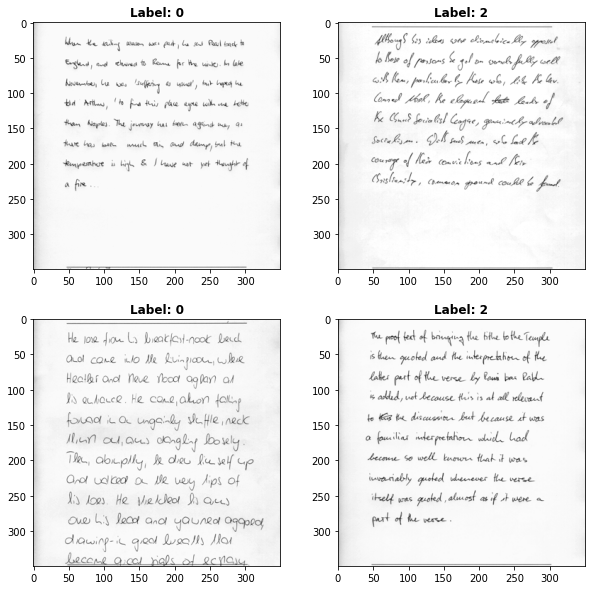

In [145]:
import matplotlib.pyplot as plt
def plot_random_samples(x, y):
  plt.figure()

  f, axarr = plt.subplots(2, 2, figsize=(10,10)) 
  rands = np.random.randint(x.shape[0], size=4)
  axarr[0, 0].imshow((x[rands[0], :, :,:]).astype(np.uint8),cmap='gray')
  axarr[0, 0].set_title('Label: ' + str(y[rands[0]]), fontweight='bold')

  axarr[1, 0].imshow((x[rands[1], :, :,:]).astype(np.uint8),cmap='gray')
  axarr[1, 0].set_title('Label: ' + str(y[rands[1]]), fontweight='bold')

  axarr[0, 1].imshow((x[rands[2], :, :,:]).astype(np.uint8),cmap='gray')
  axarr[0, 1].set_title('Label: ' + str(y[rands[2]]), fontweight='bold')

  axarr[1, 1].imshow((x[rands[3], :, :,:]).astype(np.uint8),cmap='gray')
  axarr[1, 1].set_title('Label: ' + str(y[rands[3]]), fontweight='bold')

  plt.show()

plot_random_samples(X, Y_writing)

In [146]:
from google.colab import files

files.download('X_paragraph_class.npy')
files.download('Y_writing_class_paragraph.npy')
files.download('Y_gender_class_paragraph.npy')

<IPython.core.display.Javascript object>

<IPython.core.display.Javascript object>

<IPython.core.display.Javascript object>

<IPython.core.display.Javascript object>

<IPython.core.display.Javascript object>

<IPython.core.display.Javascript object>

## line preprocessing

In [107]:
image_paths_lines = []
writing_type_labels_lines = []
gender_labels_lines = []
for filename in tqdm(os.listdir(path_to_lines)):
    image_path = os.path.join(path_to_lines, filename)
    writer = lines_dict.get(filename).get('Writer')
    gender = writers_dict.get(writer).get('Gender')
    writing_type = writers_dict.get(writer).get('WritingType')
    gender_labeled,gender_writingt = labeling(gender,writing_type)
  
    image_paths_lines.append(image_path)
    writing_type_labels_lines.append(gender_writingt)
    gender_labels_lines.append(gender_labeled)
df_line = pd.DataFrame()
df_line['image'], df_line['writing'], df_line['gender'] = image_paths_lines, writing_type_labels_lines, gender_labels_lines

100%|██████████| 13353/13353 [00:00<00:00, 236443.22it/s]


In [108]:
df_line

,image,writing,gender
0,/content/drive/MyDrive/lines folder/p02-022-07...,2,1
1,/content/drive/MyDrive/lines folder/p02-022-03...,2,1
2,/content/drive/MyDrive/lines folder/p02-027-01...,0,0
3,/content/drive/MyDrive/lines folder/p02-027-02...,0,0
4,/content/drive/MyDrive/lines folder/p02-027-03...,0,0
...,...,...,...
13348,/content/drive/MyDrive/lines folder/a01-058x-0...,3,1
13349,/content/drive/MyDrive/lines folder/a01-058x-0...,3,1
13350,/content/drive/MyDrive/lines folder/a01-058x-0...,3,1
13351,/content/drive/MyDrive/lines folder/a01-058x-0...,3,1


In [115]:

df_line.to_csv('line classification.csv')
files.download('line classification.csv')

<IPython.core.display.Javascript object>

<IPython.core.display.Javascript object>

In [112]:
def extract_features_lines(images):
    features = []
    for image in tqdm(images):
        img = load_img(image, color_mode = "grayscale")
        img = img.resize((60,800))
        img = np.array(img)
        features.append(img)

    features = np.array(features)
    # ignore this step if using RGB
    features = features.reshape(len(features), 60, 800, 1)
    return features

In [113]:
X_line = extract_features_lines(df_line['image'])
Y_writing_line = np.array(df_line['writing'])
Y_gender_line = np.array(df_line['gender'])

np.save('X_line_class.npy', X_line)
np.save('Y_writing_line_class.npy', Y_writing_line)
np.save('Y_gender_line_class.npy', Y_gender_line)

100%|██████████| 13353/13353 [43:03<00:00,  5.17it/s]


In [114]:

files.download('X_line_class.npy')
files.download('Y_writing_line_class.npy')
files.download('Y_gender_line_class.npy')

<IPython.core.display.Javascript object>

<IPython.core.display.Javascript object>

<IPython.core.display.Javascript object>

<IPython.core.display.Javascript object>

<IPython.core.display.Javascript object>

<IPython.core.display.Javascript object>